In [2]:
import os 
from  secret_key import openai_key
from langchain.llms import OpenAI
os.environ['OPENAI_API_KEY'] = openai_key

In [3]:
## temperature - How creative you want your answer need to be
llm = OpenAI(temperature=0.6)
name = llm('I want to open a restraunt for Indian Food. Suggest a fency name for this .')
print(name)



Royal Indian Cuisine


##### Prompt Template

In [4]:
## You can ask same question for Italian or Mexican Food. We will not write complete question again and again .Instead we will use prompt
from langchain.prompts import PromptTemplate

prompt_template_name = PromptTemplate(input_variables=['cuisine'],
               template = 'I want to open a restraunt for {cuisine} food.Sugget a fency name for this')

prompt_template_name.format(cuisine='mexican')

'I want to open a restraunt for mexican food.Sugget a fency name for this'

##### Chains

To connect prompt template with LLM model we will have to use chains 

In [5]:
from langchain.chains import LLMChain
chain = LLMChain(llm=llm,prompt=prompt_template_name)
chain.run('American')

'?\n\nAmerican Fusion Cuisine'

##### Simple Sequential Chain 

Till now we were giving input as cuisine and LLM was suggesting restraunt name . But Now for that .You also need to generate Food items . 

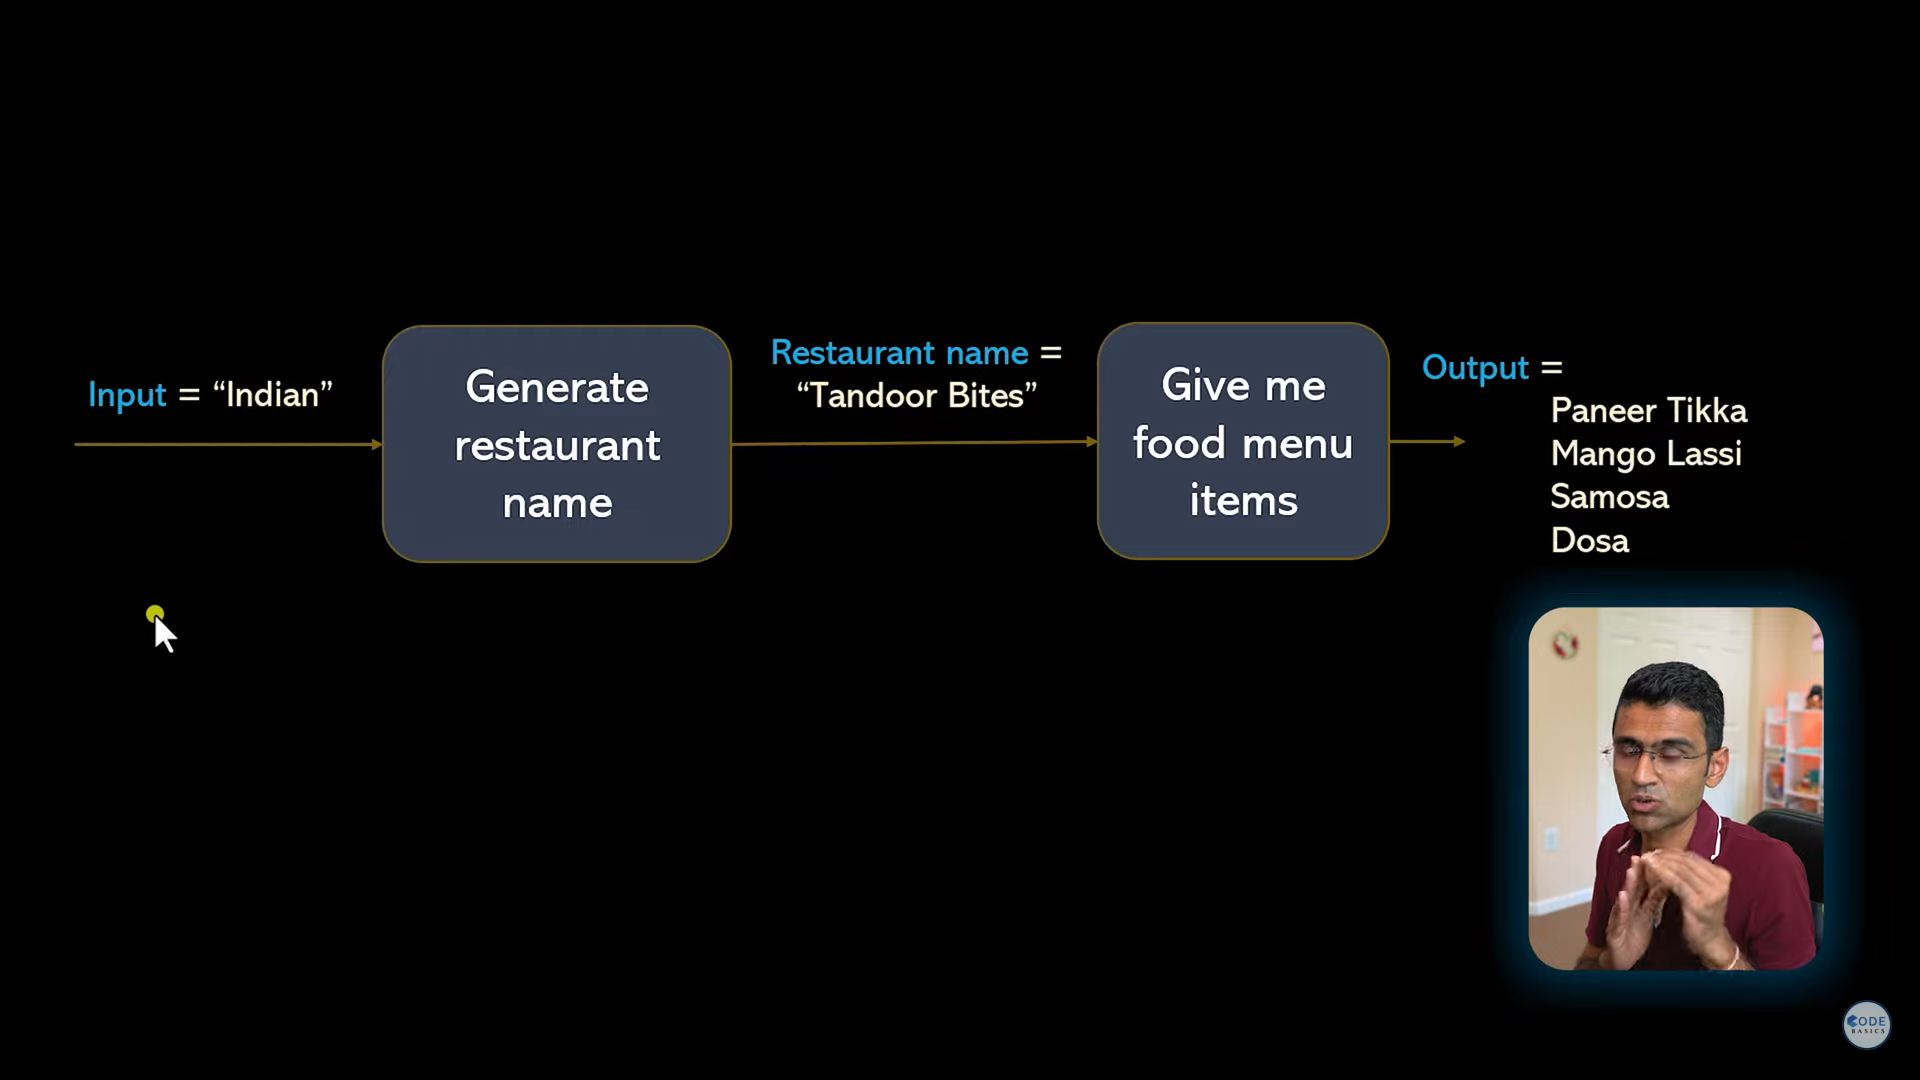

In [6]:
llm = OpenAI(temperature=0.6)
prompt_template_name = PromptTemplate(
    input_variables=['cuisine'],
    template = 'I want to open a restraunt for {cuisine} food.Suggest a fency name for this.Only one name please'
)
name_chain = LLMChain(llm=llm,prompt=prompt_template_name)

prompt_template_items = PromptTemplate(
    input_variables=['restraunt_name'],
    template='Suggest some menu items for {restraunt_name}.Return it as a comma seperated list'
)

food_items_chain = LLMChain(llm=llm,prompt=prompt_template_items)

## SimpleSequentialChain will give o/p  for only last chain. You wont get output for each chain

from langchain.chains import SimpleSequentialChain
chain = SimpleSequentialChain(chains=[name_chain,food_items_chain])
response = chain.run('Indian')
print(response)




Samosa, Paneer Tikka Masala, Chana Masala, Dal Makhani, Aloo Gobi, Naan, Tandoori Chicken, Biryani, Raita, Gulab Jamun.


##### SequentialChain
To get output for each chain . We will have to use SequentialChain

In [7]:
llm = OpenAI(temperature=0.6)
prompt_template_name = PromptTemplate(
    input_variables=['cuisine'],
    template = 'I want to open a restraunt for {cuisine} food.Suggest a fency name for this.Only one name please'
)
name_chain = LLMChain(llm=llm,prompt=prompt_template_name,output_key='restraunt_name')

prompt_template_items = PromptTemplate(
    input_variables=['restraunt_name'],
    template='Suggest some menu items for {restraunt_name}.Return it as a comma seperated list'
)

food_items_chain = LLMChain(llm=llm,prompt=prompt_template_items,output_key='menu_items')

## SimpleSequentialChain will give o/p  for only last chain. You wont get output for each chain

from langchain.chains import SequentialChain
chain = SequentialChain(chains=[name_chain,food_items_chain],
                        input_variables=['cuisine'],
                        output_variables=['restraunt_name','menu_items'])

## You might have multiple input variables. Therefore we will have to use dictionary 
response = chain({'cuisine':'Mexican'})
print(response)


{'cuisine': 'Mexican', 'restraunt_name': '\n\nTaco Fiesta', 'menu_items': '\n\nTaco Salad, Fish Tacos, Chicken Tacos, Chorizo Tacos, Carne Asada Tacos, Beef Barbacoa Tacos, Carnitas Tacos, Vegetarian Tacos, Quesadillas, Nachos, Burritos, Guacamole, Pico de Gallo, Refried Beans.'}


### Agents

You wont get any information realtime . Like booking flights

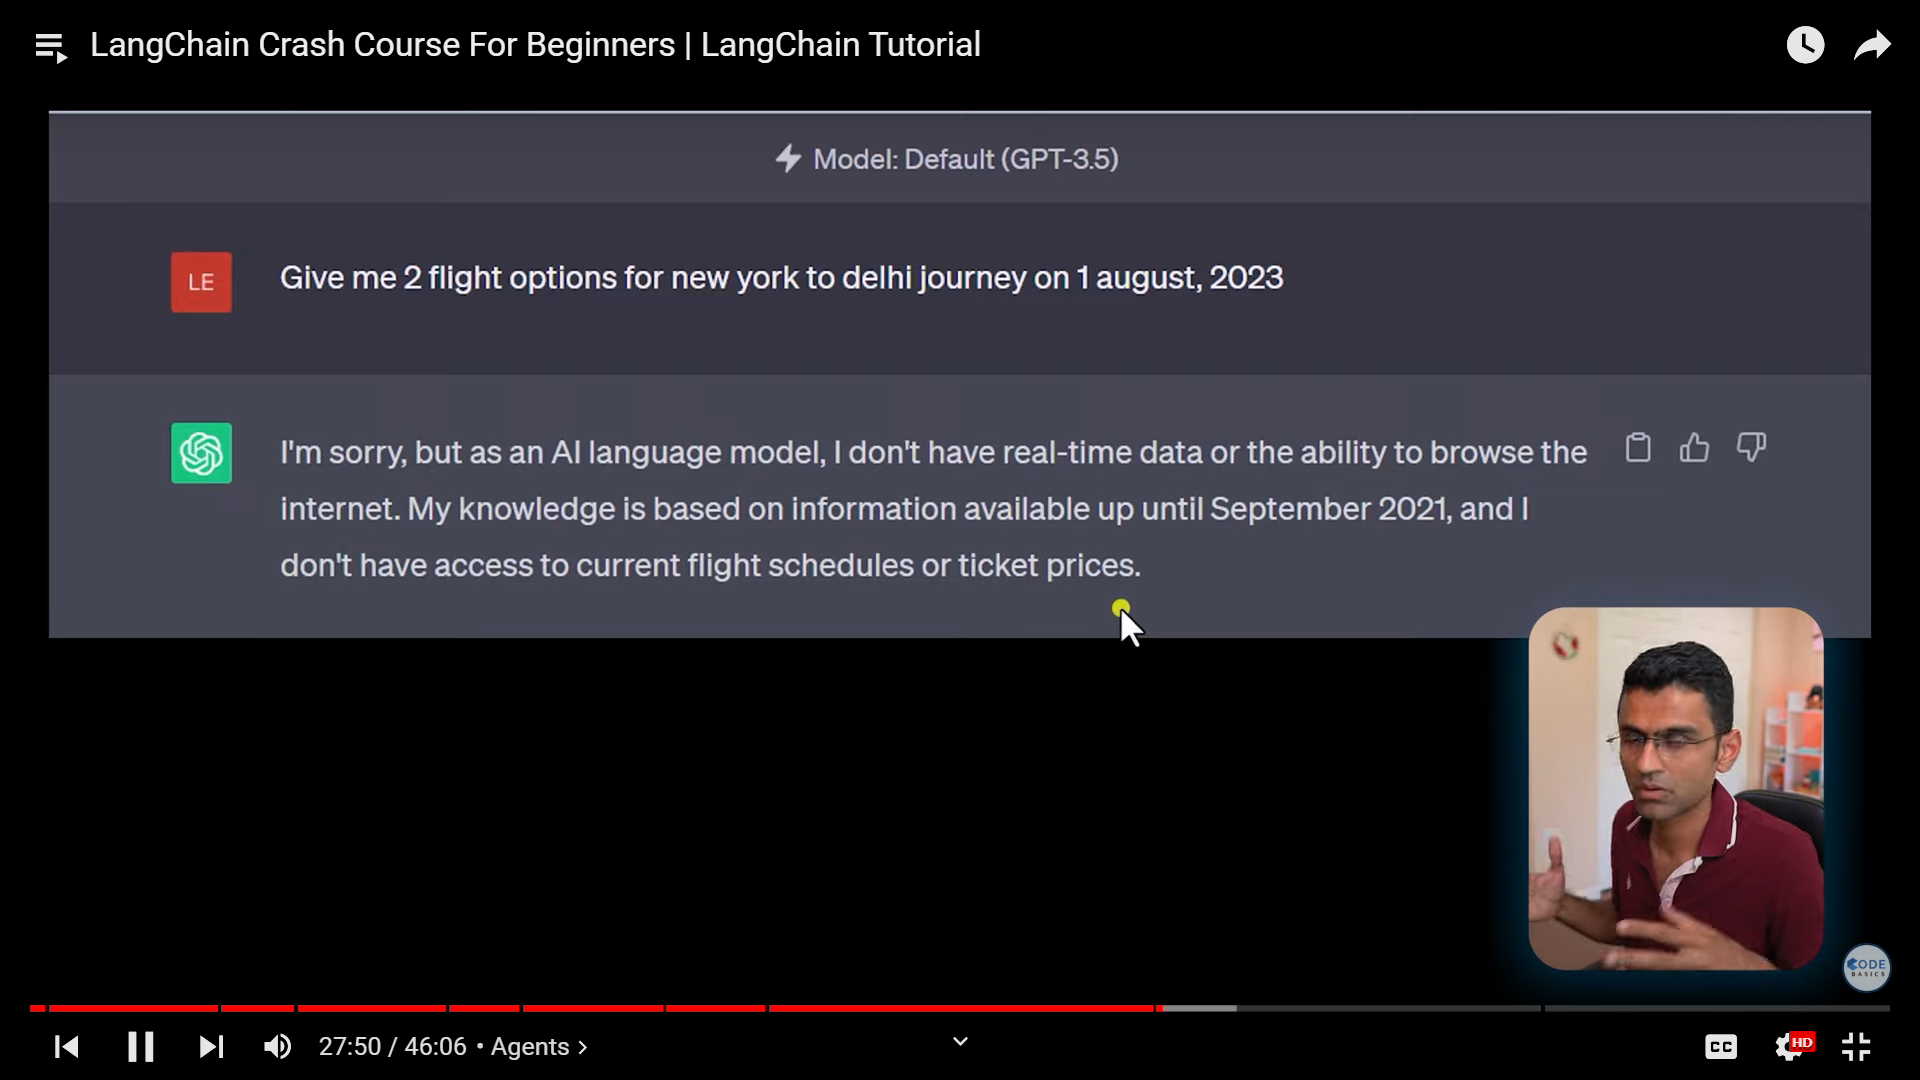

In GPT++ Subscription .You can use plugins 

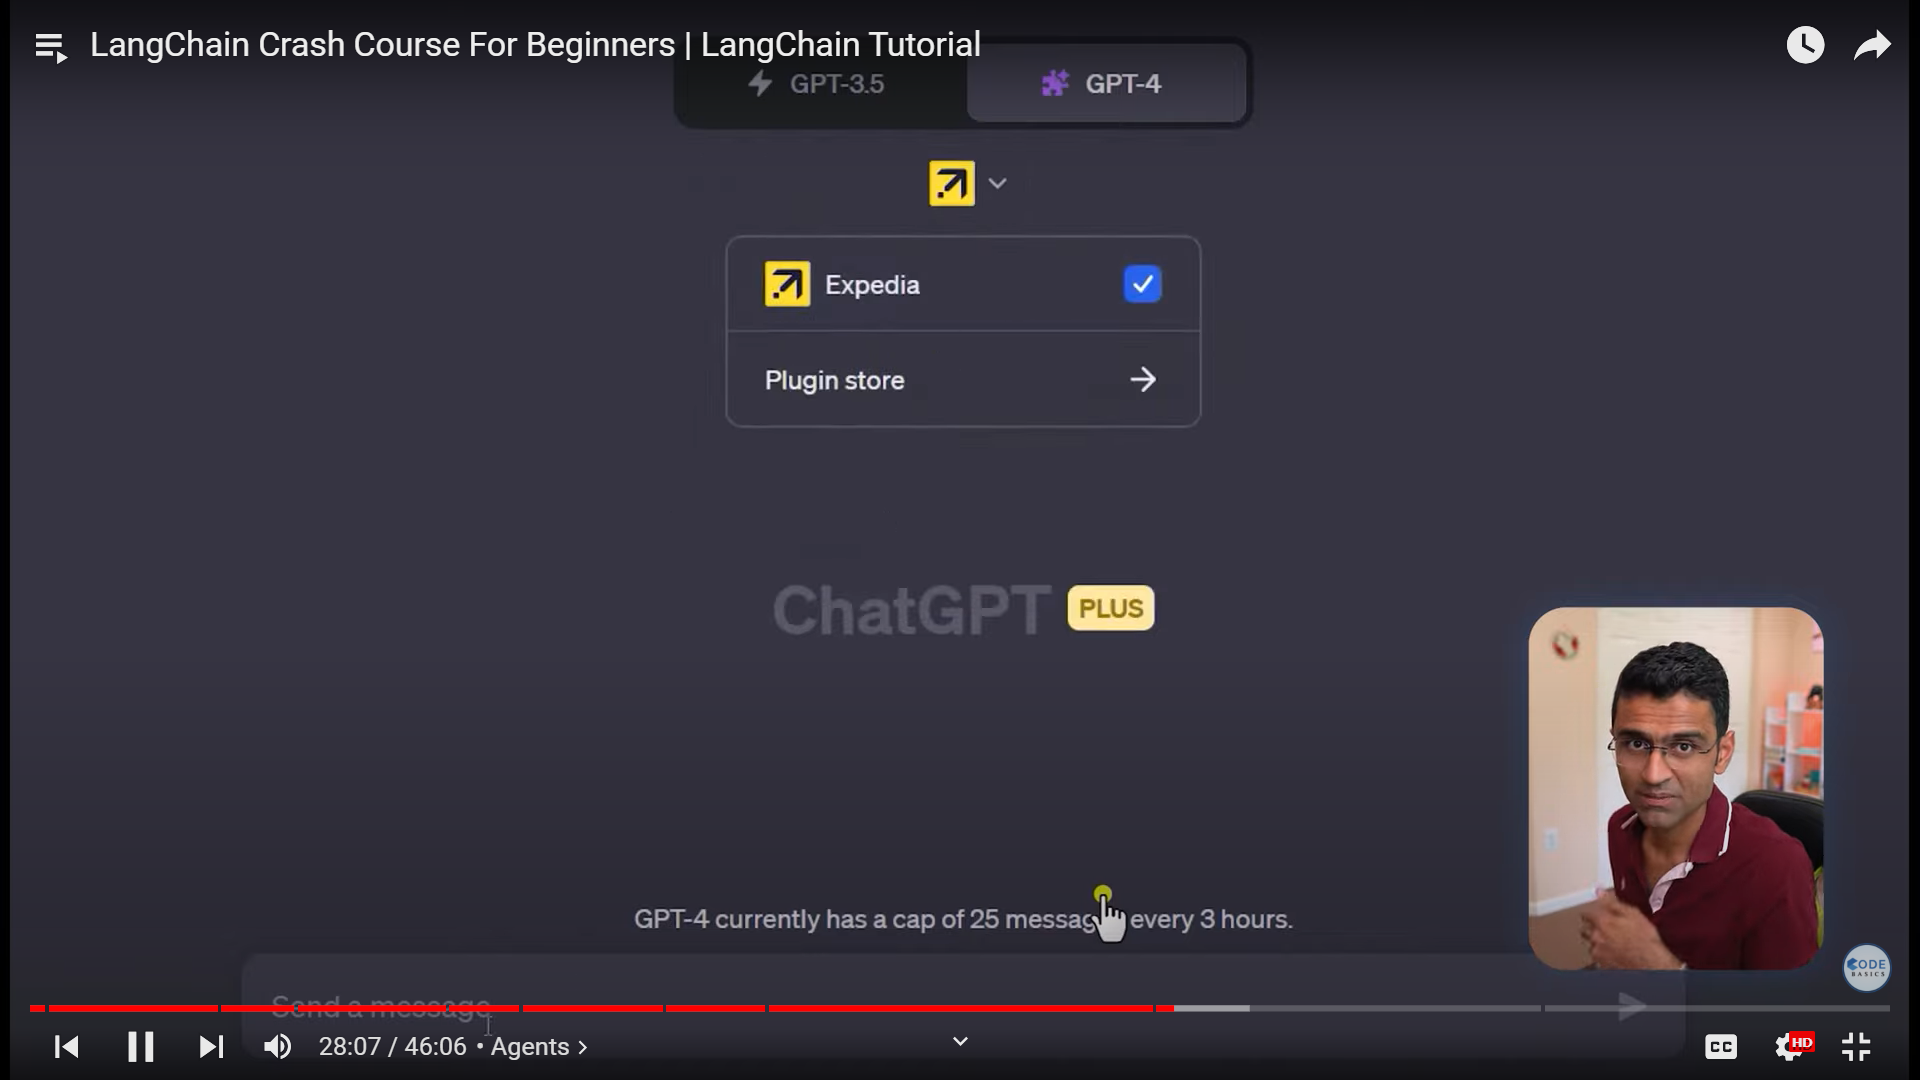

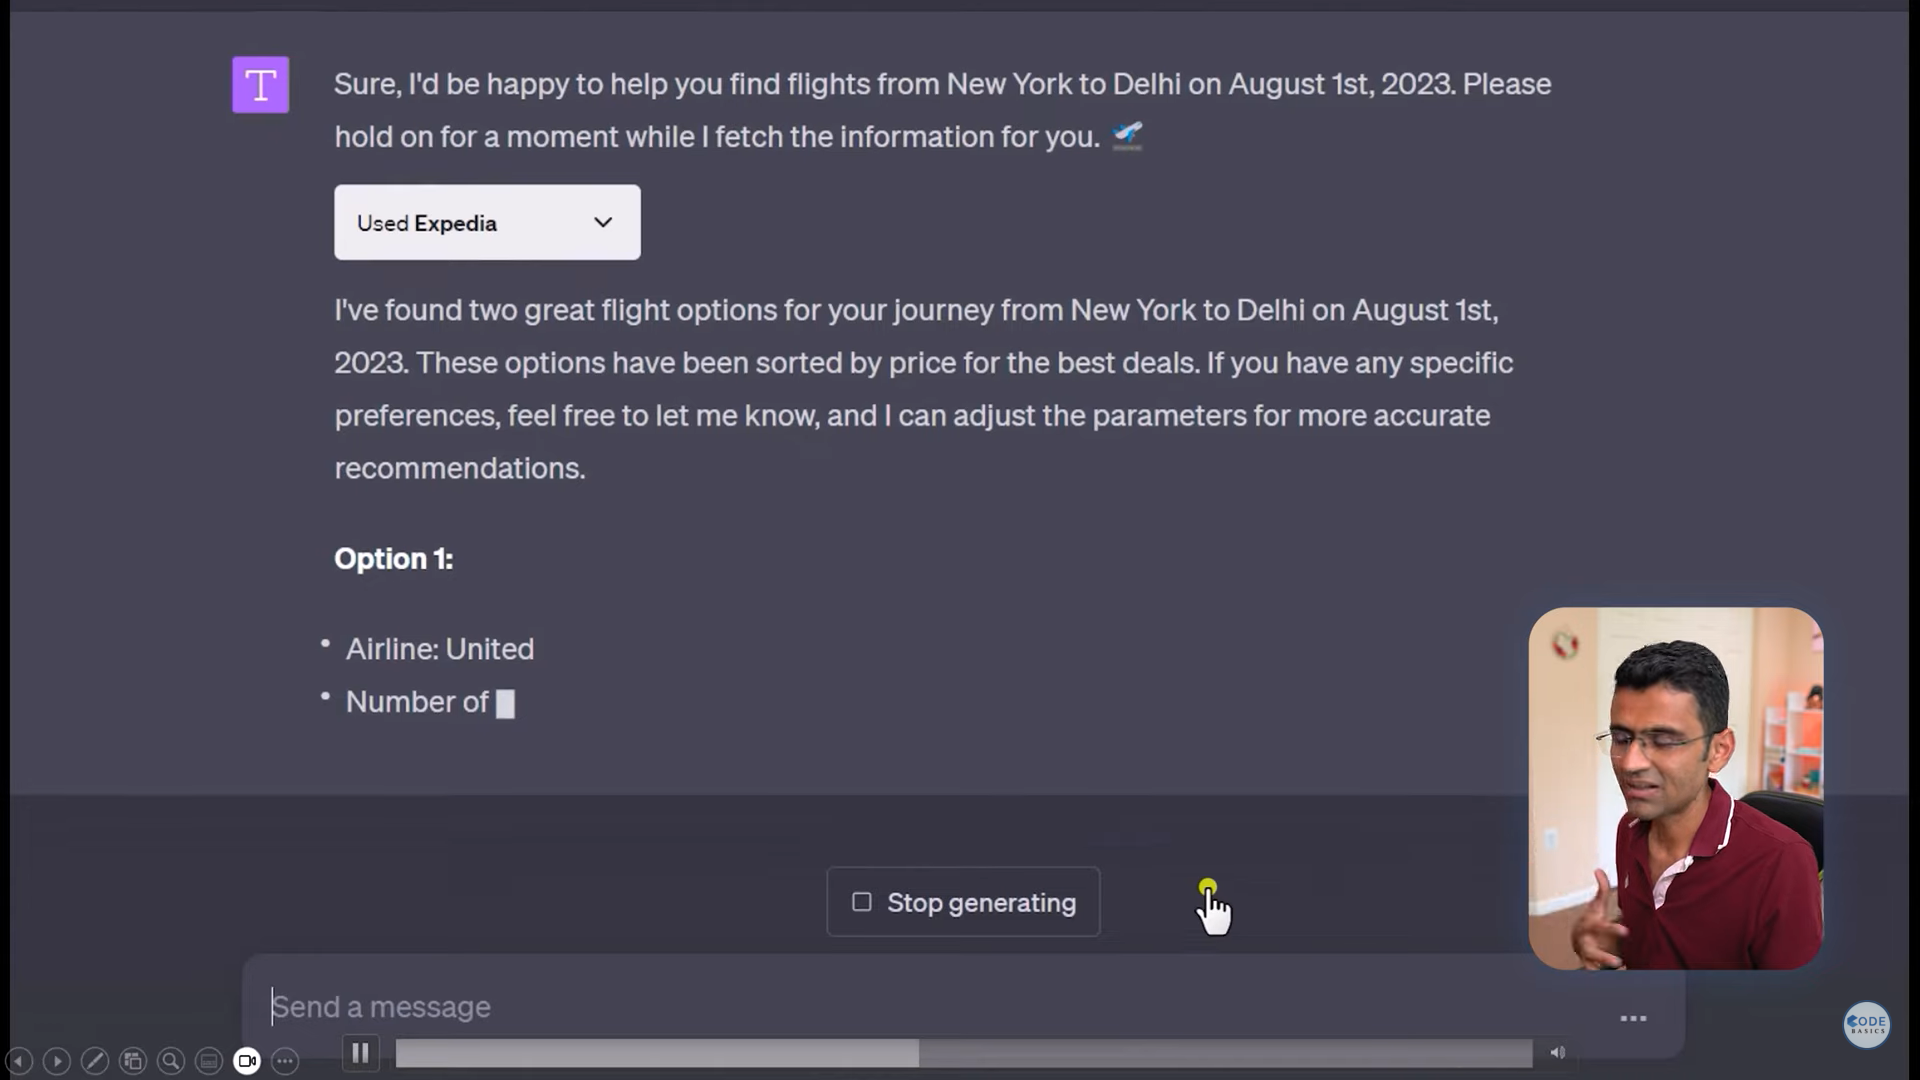

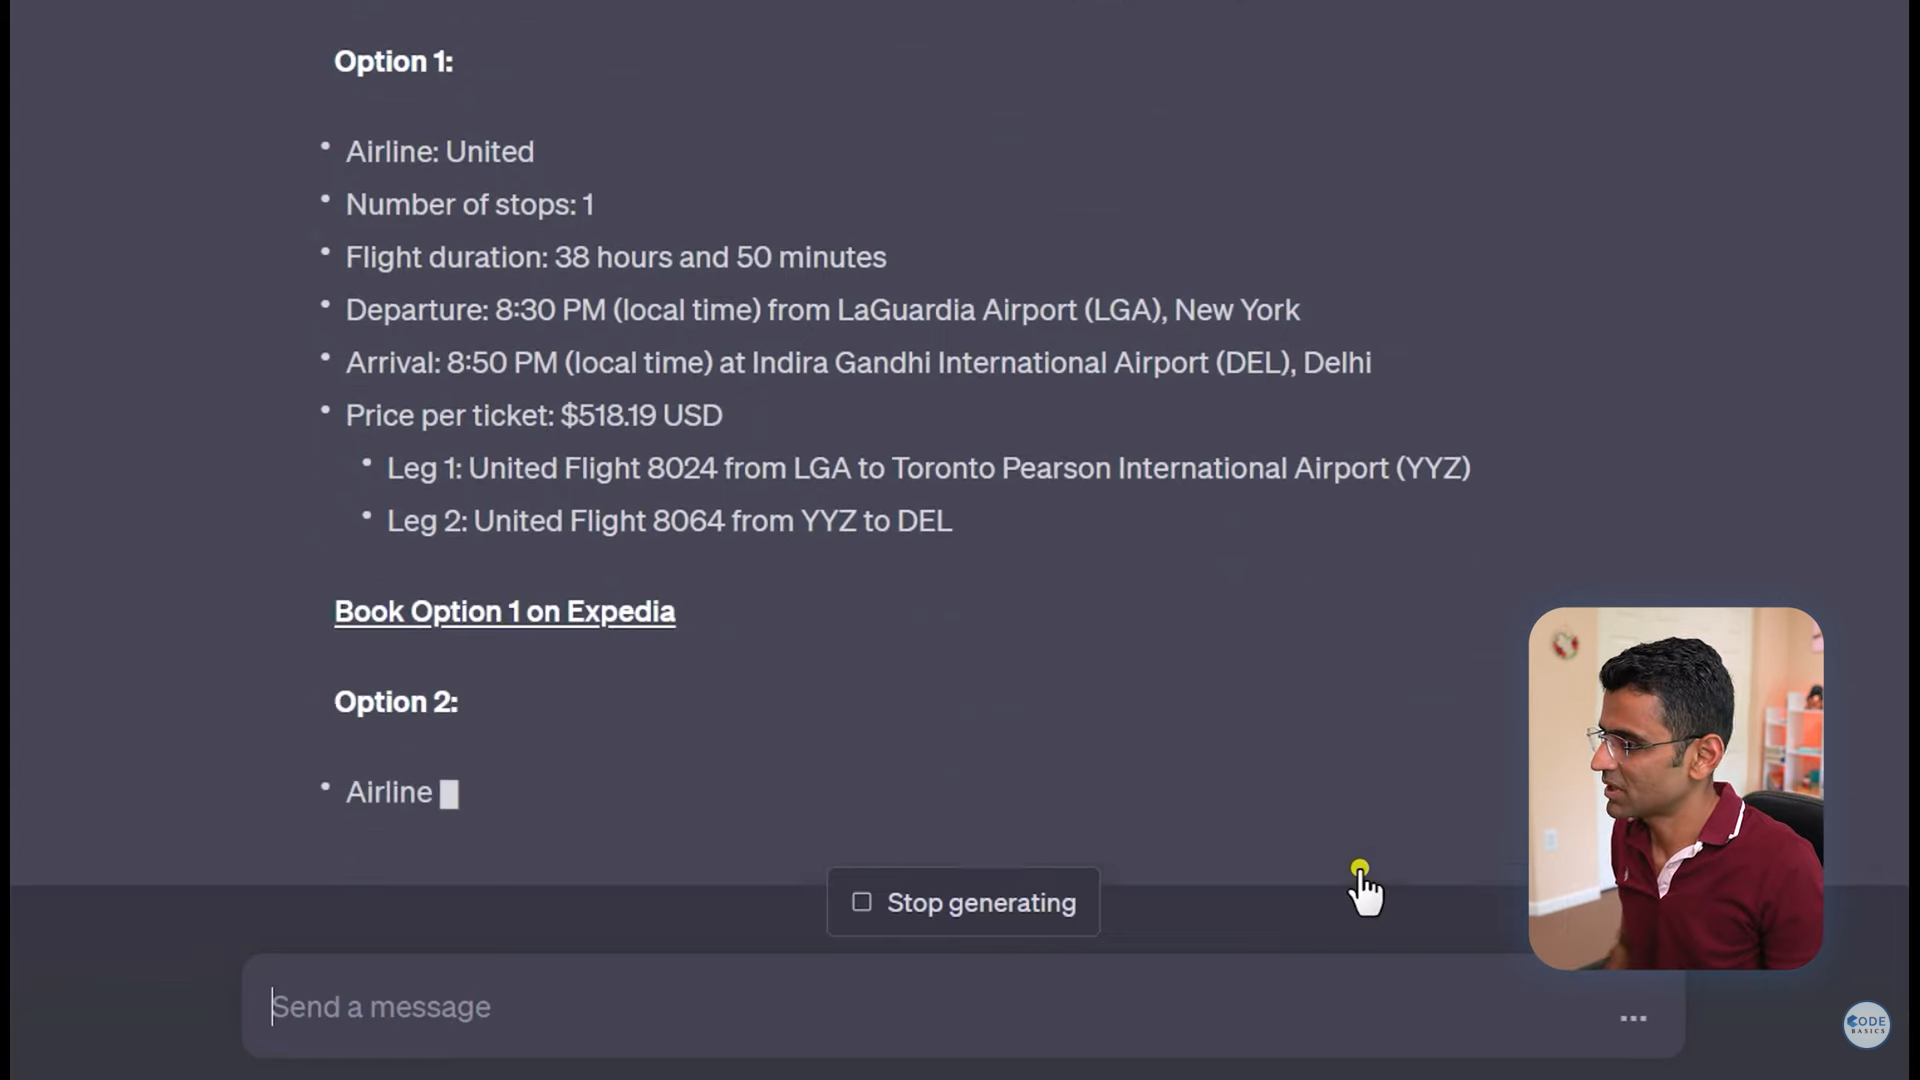

What happened when we enable plugin . LLM will think like how normal hum being thinks 

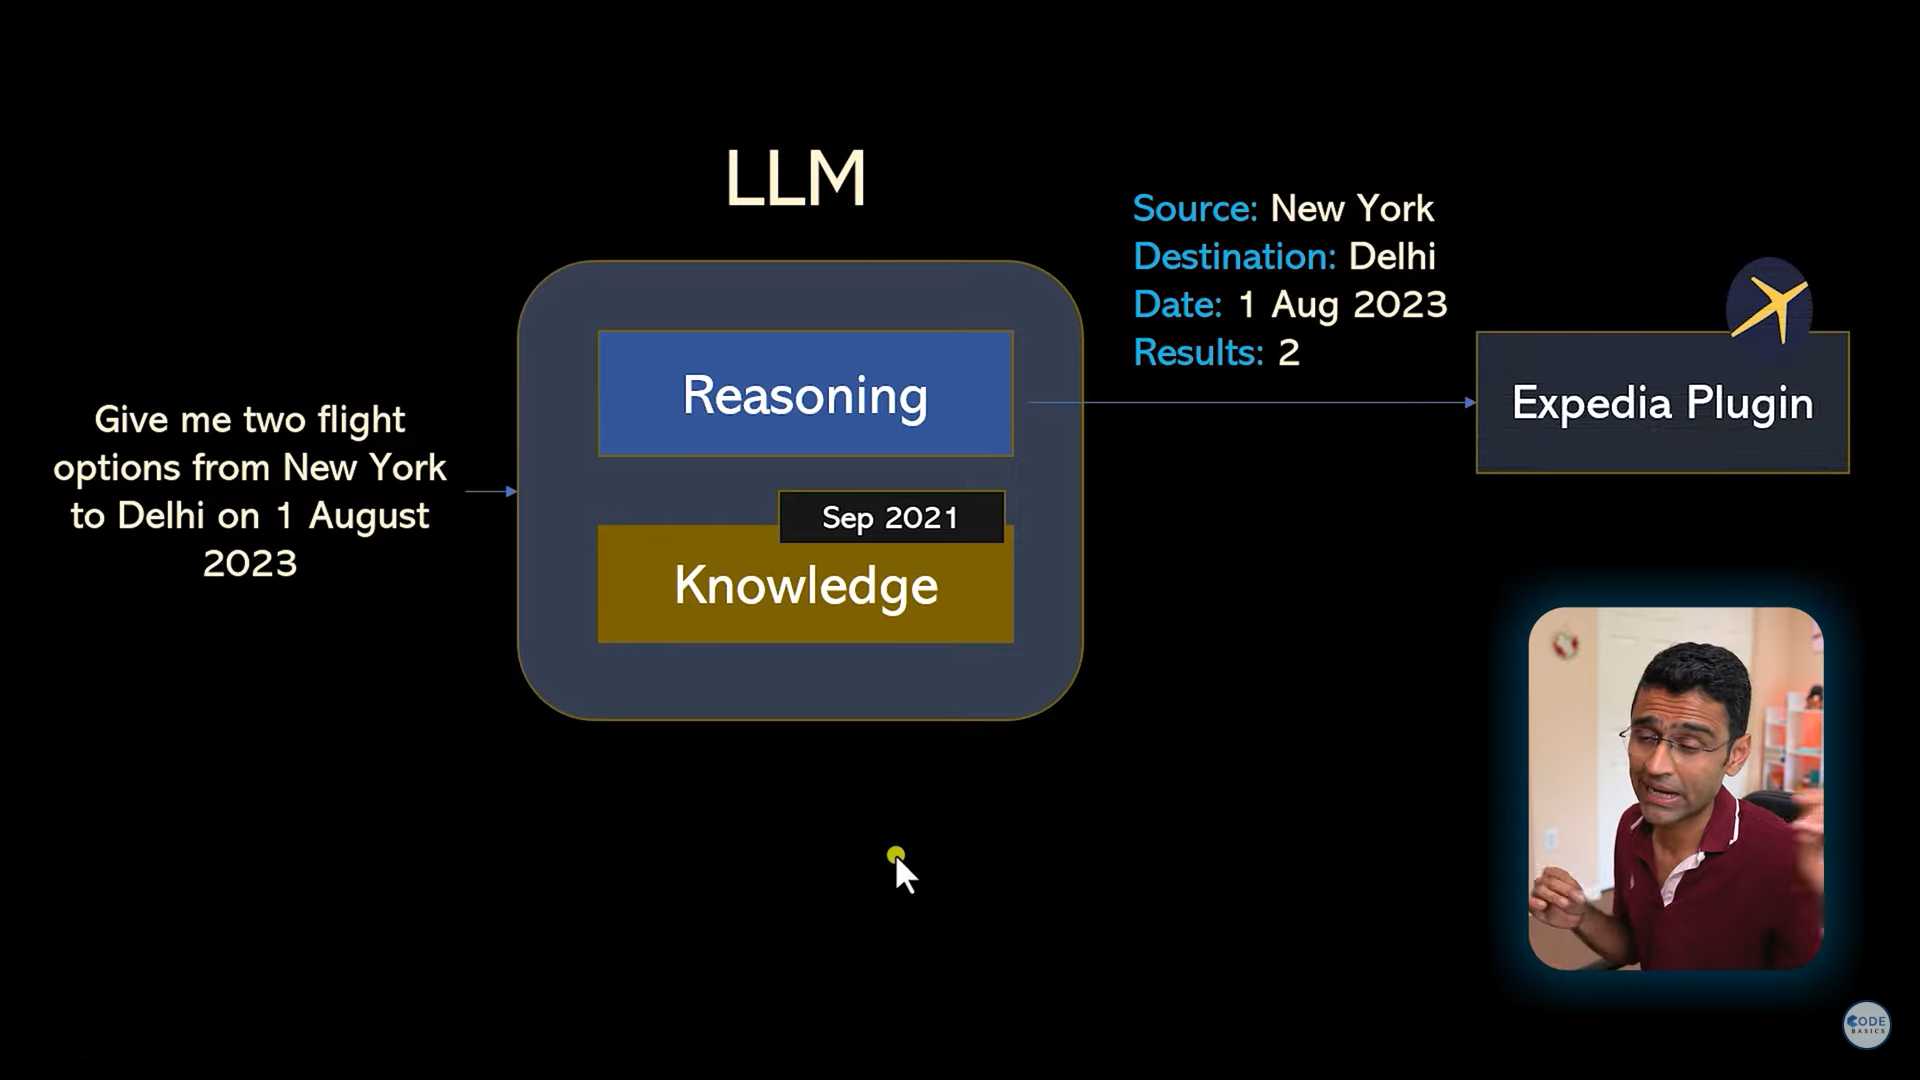

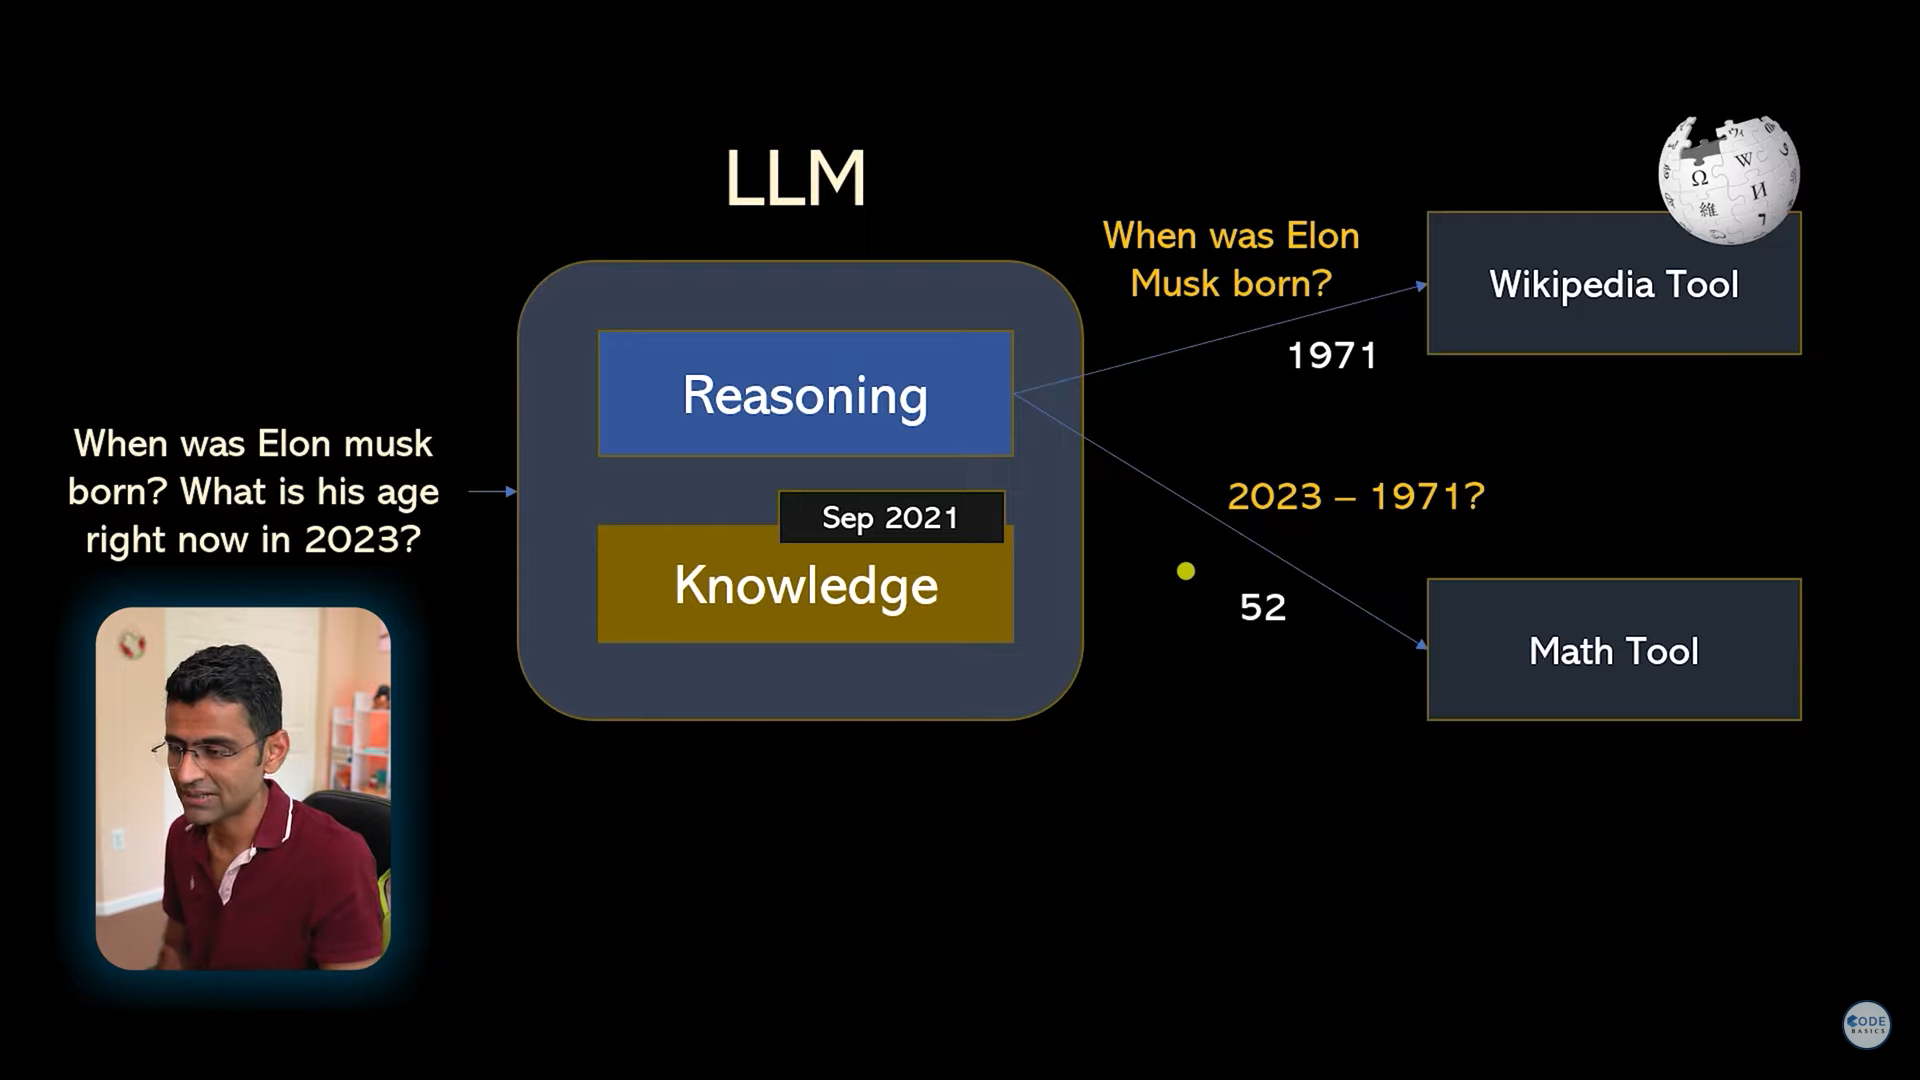

Agents will connect with external tools and it will use LLM Reasoning capabilities to perform a task.

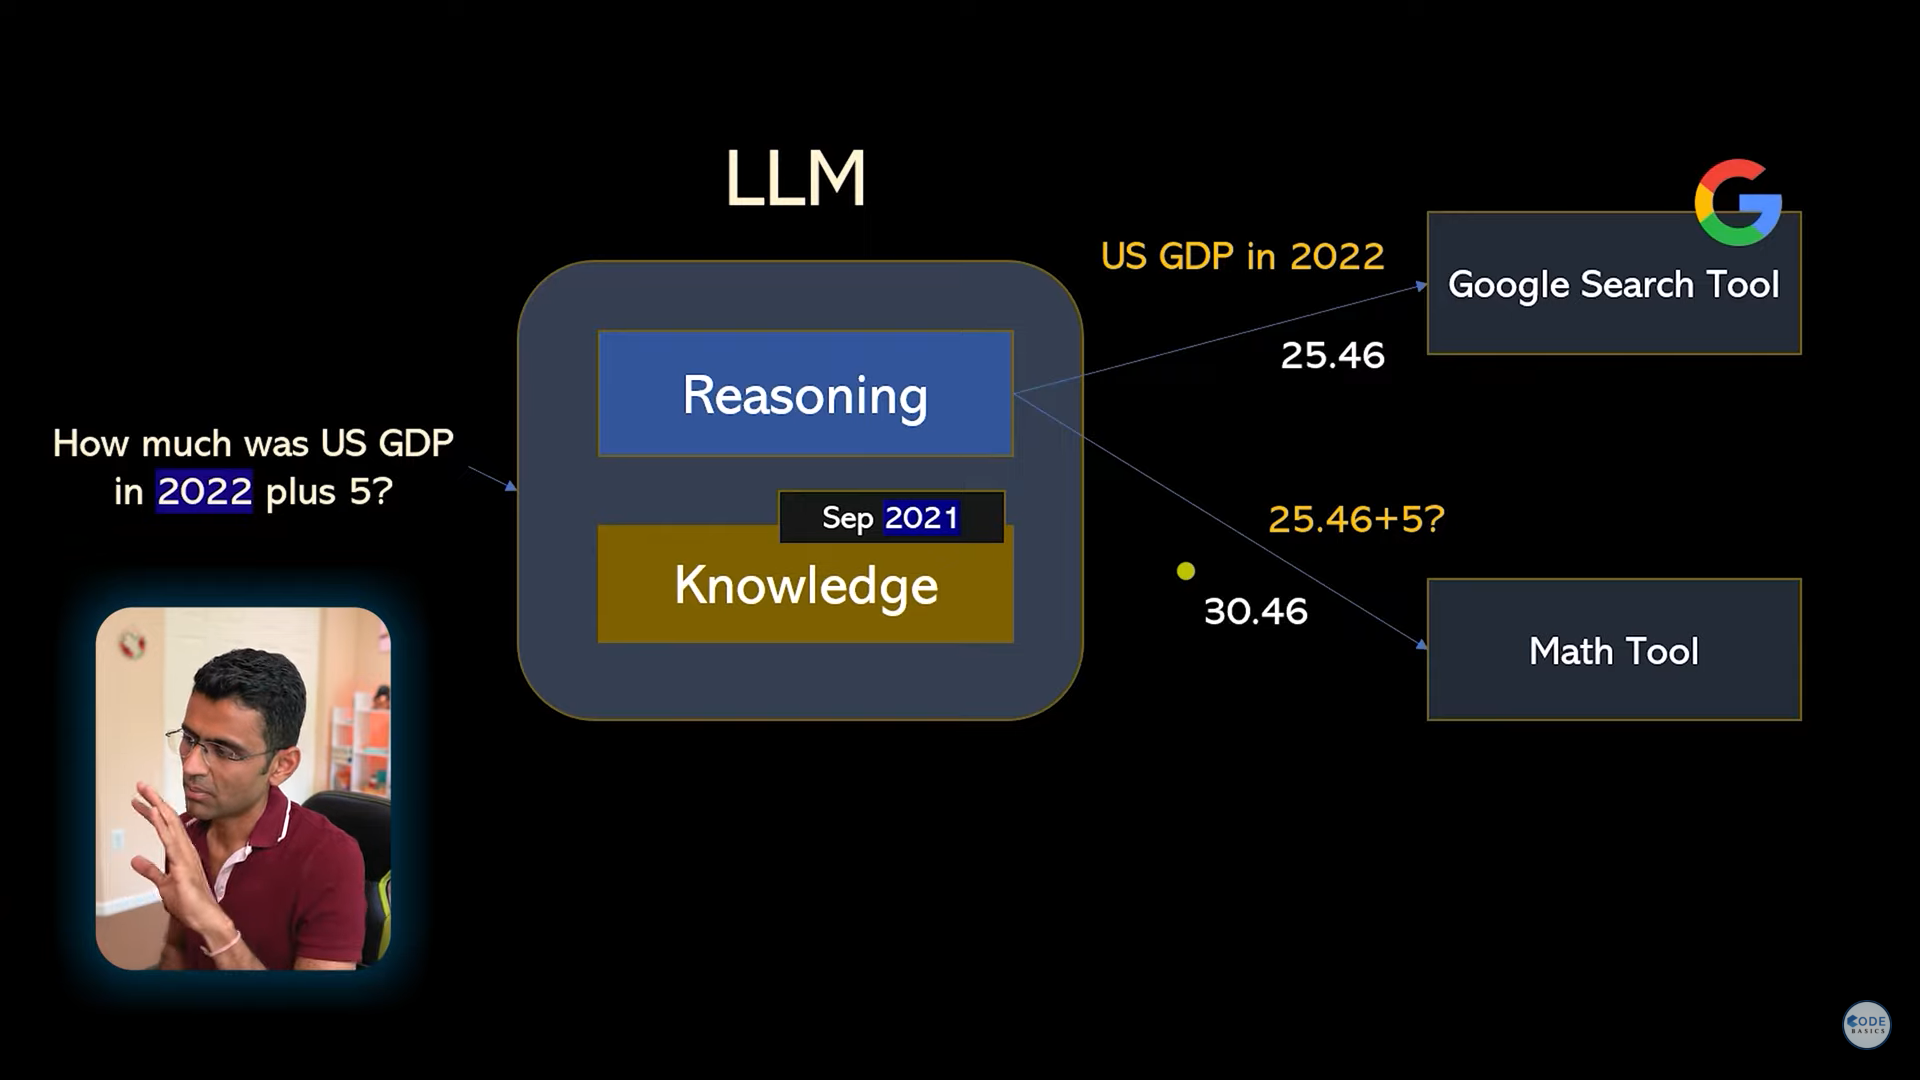

#### Agents Tools and classes with Examples


In [6]:
from langchain.agents import AgentType,initialize_agent,load_tools
from langchain.llms import OpenAI
from secret_key import openai_key
import os
os.environ['OPENAI_API_KEY'] = openai_key
llm = OpenAI(temperature=0.6)

tools = load_tools(['wikipedia','llm-math'],llm=llm)
## Thought and action - ZERO_SHOT_REACT_DESCRIPTION
agent = initialize_agent(tools,
                         llm,
                         agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
                         verbose=True)
agent.run('When was Elon Musk born ? . What is his age right now in 2023')




> Entering new AgentExecutor chain...
 I need to find out when Elon Musk was born and how old he is now
Action: Wikipedia
Action Input: Elon Musk
Observation: Page: Elon Musk
Summary: Elon Reeve Musk ( EE-lon; born June 28, 1971) is a businessman and investor. Musk is the founder, chairman, CEO and chief technology officer of SpaceX; angel investor, CEO, product architect and former chairman of Tesla, Inc.; owner, chairman and CTO of X Corp.; founder of the Boring Company; co-founder of Neuralink and OpenAI; and president of the Musk Foundation. He is the wealthiest person in the world, with an estimated net worth of US$211 billion as of October 2023, according to the Bloomberg Billionaires Index, and $234 billion according to Forbes, primarily from his ownership stakes in Tesla and SpaceX.Musk was born in Pretoria, South Africa, and briefly attended the University of Pretoria before immigrating to Canada at age 18, acquiring citizenship through his Canadian-born mother. Two years la

'Elon Musk was born on June 28, 1971, and is currently 52 years old in 2023.'

#### Agents - SERP API KEY - Google Search - Google Products

In [17]:
from langchain.agents import AgentType,initialize_agent,load_tools
from langchain.llms import OpenAI
import os
from secret_key import serpapi_key
os.environ['SERPAPI_API_KEY']= serpapi_key
llm = OpenAI(temperature=0.6)

tools = load_tools(['serpapi','llm-math'],llm=llm)
## Thought and action - ZERO_SHOT_REACT_DESCRIPTION
agent = initialize_agent(tools,
                         llm,
                         agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
                         verbose=True)
agent.run('What was GDP of India in 2022?.Add 1 million us dollars in it ')



> Entering new AgentExecutor chain...
 I need to find the GDP of India in 2022 and then add 1 million US dollars to it
Action: Search
Action Input: "GDP India 2022"
Observation: 3,389.69
Thought: I need to add 1 million US dollars to the GDP of India in 2022
Action: Calculator
Action Input: 3389.69 + 1000000

Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for text-davinci-003 in organization org-LUDHtprj8OJ75TBCB59P7iIu on requests per min (RPM): Limit 3, Used 3, Requested 1. Please try again in 20s. Visit https://platform.openai.com/account/rate-limits to learn more. You can increase your rate limit by adding a payment method to your account at https://platform.openai.com/account/billing..
Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for text-davinci-003 in organization org-LUDHtprj8OJ75TBCB59P7iIu on requests per min (RPM): Limit 3, Used 3, Requested 1. Please try again in 20s. Visit https://platform.openai.com/account/rate-limits to learn more. You can increase your rate limit by adding a payment method to your account at https://platform.openai.com/account/billing..
Retrying langchain.l


Observation: Answer: 1003389.69
Thought:

Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for text-davinci-003 in organization org-LUDHtprj8OJ75TBCB59P7iIu on requests per min (RPM): Limit 3, Used 3, Requested 1. Please try again in 20s. Visit https://platform.openai.com/account/rate-limits to learn more. You can increase your rate limit by adding a payment method to your account at https://platform.openai.com/account/billing..
Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for text-davinci-003 in organization org-LUDHtprj8OJ75TBCB59P7iIu on requests per min (RPM): Limit 3, Used 3, Requested 1. Please try again in 20s. Visit https://platform.openai.com/account/rate-limits to learn more. You can increase your rate limit by adding a payment method to your account at https://platform.openai.com/account/billing..
Retrying langchain.l

 I now know the final answer
Final Answer: The GDP of India in 2022, plus 1 million US dollars, is 1003389.69.

> Finished chain.


'The GDP of India in 2022, plus 1 million US dollars, is 1003389.69.'

### Memory 

We need that our past conversation should be remembered by LLM . 
By Default LLM Chains dont have any memory. They are stateless


In [22]:
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate

prompt_template_name = PromptTemplate(input_variables=['cuisine'],
               template = 'I want to open a restraunt for {cuisine} food.Sugget a fency name for this')

chain = LLMChain(llm=llm,prompt=prompt_template_name)
name = chain.run('Mexican')
print(name)

 restraunt

Taco Sabor


In [23]:
## Available methods the chain has - One of method is memory 
dir(chain)

['Config',
 'InputType',
 'OutputType',
 '__abstractmethods__',
 '__annotations__',
 '__call__',
 '__class__',
 '__class_getitem__',
 '__class_vars__',
 '__config__',
 '__custom_root_type__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__exclude_fields__',
 '__fields__',
 '__fields_set__',
 '__format__',
 '__ge__',
 '__get_validators__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__include_fields__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__json_encoder__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__or__',
 '__orig_bases__',
 '__parameters__',
 '__post_root_validators__',
 '__pre_root_validators__',
 '__pretty__',
 '__private_attributes__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__repr_args__',
 '__repr_name__',
 '__repr_str__',
 '__rich_repr__',
 '__ror__',
 '__schema_cache__',
 '__setattr__',
 '__setstate__',
 '__signature__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__try_updat

In [25]:
from langchain.memory import ConversationBufferMemory
memory = ConversationBufferMemory()
chain = LLMChain(llm=llm,prompt=prompt_template_name,memory=memory)
name = chain.run('Indian')
print(name)



Spice of India


In [26]:
name = chain.run('Mexican')
print(name)

 restraunt

Taco Fiesta


In [27]:
chain.memory

ConversationBufferMemory(chat_memory=ChatMessageHistory(messages=[HumanMessage(content='Indian'), AIMessage(content='\n\nSpice of India'), HumanMessage(content='Mexican'), AIMessage(content=' restraunt\n\nTaco Fiesta')]))

Problem of ConversationBufferMemory is that it will grow inifinetly

So This memory will have all your past context. So it will pass all this past contect to OpenAI while you ask new question.

So your cost will increase. So to avoid this . You can restrict the Buffer Size . i-e Just remember last 5 conversations . This can be done using ConversationChain

#### ConversationChain 

In [28]:
from langchain import ConversationChain

convo = ConversationChain(llm=OpenAI(temperature=0.7))
## Default Template
print(convo.prompt.template)

The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
{history}
Human: {input}
AI:


In [29]:
convo.run('Who won first cricket world cup')

' The first Cricket World Cup was won by the West Indies in 1975.'

In [30]:
convo.run('what is 5+5')

' 5+5 is equal to 10.'

In [31]:
convo.run('Who was the captain of winning team')

' The captain of the 1975 West Indies Cricket World Cup winning team was Clive Lloyd.'

In [32]:
convo.memory

ConversationBufferMemory(chat_memory=ChatMessageHistory(messages=[HumanMessage(content='Who won first cricket world cup'), AIMessage(content=' The first Cricket World Cup was won by the West Indies in 1975.'), HumanMessage(content='what is 5+5'), AIMessage(content=' 5+5 is equal to 10.'), HumanMessage(content='Who was the captain of winning team'), AIMessage(content=' The captain of the 1975 West Indies Cricket World Cup winning team was Clive Lloyd.')]))

In [33]:
print(convo.memory.buffer)

Human: Who won first cricket world cup
AI:  The first Cricket World Cup was won by the West Indies in 1975.
Human: what is 5+5
AI:  5+5 is equal to 10.
Human: Who was the captain of winning team
AI:  The captain of the 1975 West Indies Cricket World Cup winning team was Clive Lloyd.


In [34]:
#### Just send last 5 conversations 
from langchain.memory import ConversationBufferWindowMemory

memory = ConversationBufferWindowMemory(k=1)
convo = ConversationChain(llm=OpenAI(temperature=0.6),memory=memory)
convo.run('Who won the first cricket world cup')

' The first cricket world cup was won by the West Indies in 1975.'

In [35]:
convo.run('What is 5  + 5')

' 10.'

In [36]:
### In above it remembered . Its prev question of first cricket world cup because k = 1
### But in below question. It wont remember first cricket world cup question . It will only remember 5+5 
## So it wont have any context of winning team

convo.run('who was the captain of winning team')

" I'm not sure, but I can research the answer if you'd like."